# COVID-19 demographic disparities

### Human Centered Data Science - Final Project

## Project Motivation

The global health crisis of year 2020, COVID-19 is spreading human suffering, killing people, impacting businesses and changing lives of people forever. It isn't only a disease, but it is a human, economic and social crisis. The coronavirus disease (COVID-19), is attacking societies at their core. Though COVID-19 pandemic affects all segments of the population, it is observed that there is significant demographic disparity in COVID-19 cases and its impact.  COVID-19 seems particularly detrimental to members of those social groups in the most vulnerable situations, continues to affect populations, including people living in poverty situations, older persons, persons with disabilities, youth, and indigenous peoples. Early evidence indicates that that the health and economic impacts of the virus are being borne disproportionately by poor people. I am personally deeply saddened with COVID-19 outbreak itself, however it's more disturbing to see that certain segments of society has to suffer more than usual, adding to their existing difficulties.  

As a student of Human Centered Data Science, I am intrigued to study the COVID-19 cases and their impact on various segments of population and analyze if there are significant demographic disparities of this pandemic. This was revealing analysis project to study how COVID-19 impact is seen at varying segments of people demographics of certain ethnicities, age groups, income groups and geographic locations. I am interested in analyzing COVID-19 cases data by applying Human Centered Data Science practices so as to come up better answers to find any significant disparities in COVID-19 impact. This analysis will be useful to raise awareness in society as well as governmental agencies so that appropriate actions can be taken to minimize the COVID-19 impact on all segments of society. 

## Dataset

There are various sources of data available on internet to perform this study. I found one reliable source of data at 'Center of Disease Control and Prevention' website [cdc.gov](https://www.cdc.gov/). This data is maintained authoritatively by CDC, is updated frequently, is publicly available, and undergoes stringent data quality assurance routines. The COVID-19 case surveillance system database includes patient-level data reported to U.S. states and autonomous reporting entities, including New York City and the District of Columbia, as well as U.S. territories and states. These deidentified data include demographic characteristics, exposure history, disease severity indicators and outcomes.

Dataset Links: [COVID-19 Case Surveillance data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf/data) and [COVID-19 deaths and populations](https://data.cdc.gov/NCHS/Distribution-of-COVID-19-deaths-and-populations-by/jwta-jxbg/data) 


Terms of Use for these datasets are documented in detail at [COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf/data) and [Public Domain U.S. Government](https://www.usa.gov/government-works).

The Case Surveillance Task Force and Surveillance Review and Response Group (SRRG) within CDC’s COVID-19 Response provide stewardship for datasets that support the public health community’s access to COVID-19 data while protecting patient privacy.

## Research Questions:  

This project focuses its analysis on COVID-19 case surveillance data to understand demographic disparities in COVID-19 cases and their varying degree of impact on different segments of society.
- Are people from specific age-group more prone to COVID-19 infection or death than other age-groups? 
- Is COVID-19 mortality rate more prevalent in specific race and ethnicity (combined) segment than others? 

## Related Work



With widespread devastating impacts of COVID-19, there is significant amount of research being conducted throughout the world. The preliminary analysis available on CDC official website ([cdc.gov](https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm)) shows that COVID-19 death ratio is significantly higher in Non-Hispanic White population than others. The latest research "[THE COLOR OF CORONAVIRUS](https://www.apmresearchlab.org/covid/deaths-by-race#:~:text=The%20COVID%2D19%20death%20rate,per%20100%2C000%2C%20as%20shown%20below.): COVID-19 DEATHS BY RACE AND ETHNICITY IN THE U.S." published by APM research lab reveals that Black and Indigenous Americans continue to suffer the greatest loss of life—with both groups now experiencing a COVID-19 death toll exceeding 1 in 1,000 nationally. The [Morbidity and Mortality Weekly Report (MMWR)](https://www.cdc.gov/mmwr/volumes/69/wr/mm6942e1.htm)  the analysis of 114,411 COVID-19–associated deaths reported to National Vital Statistics System during May–August 2020, found that 51.3% of decedents were non-Hispanic White, 24.2% were Hispanic or Latino (Hispanic), and 18.7% were non-Hispanic Black. The percentage of Hispanic decedents increased from 16.3% in May to 26.4% in August. There are several other research being published on this subject and has helped me to perform better research work on this project.

## Methodology

For this COVID-19 demographic disparities analysis, given large quantitative data and multiple demographic dimensions, I found it more interesting to perform visual exploratory data analysis (EDA) using various rich visualization packages available in Python programming language. I choose to perform visual exploratory data analysis as it gives more objective view of data in most intuitive way and easier to understand by anyone else reproducing it. To maintain privacy of individuals in study population, data is anonymized. Given the human centered aspect of analysis I am intrigued to slice and dice the analysis with various human dimensions such as Age group, race and ethnicity etc. Through this multi-dimensional analysis, by applying human centered data analysis principles, I attempted to understand and address any bias in data used for this study. All these analysis methodologies, research from related work and feedback from peers helped me to answer my research questions. 

## Data Aquisition

First we will import python modules required for our analysis.

In [1]:
import urllib.request
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import os
from functools import reduce
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Let's first aquire and ingest data from CDC website. We will define download_data utility function which can be reused. 

In [2]:
# Utility Function to download data from website
def download_data(url,filename):
    response = urllib.request.urlretrieve(url, filename)
    return response

Here we download the data from CDC website and store it locally in data folder. To avoid downloading big dataset again, we can either use this dataset locally or download fresh. As data source is updated weekly, I highly recommend downloading latest data in future.  

In [3]:
# Download case survelliance and mortality data
# Disable below lines when performing analysis on locally downloaded data as it is time consuming
#download_surveillance = download_data('https://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD', 
#                         'data/COVID_19_Case_Surveillance_Public_Use_Data.csv')
download_mortality = download_data('https://data.cdc.gov/api/views/jwta-jxbg/rows.csv?accessType=DOWNLOAD', 
                         'data/COVID_19_deaths_population.csv')

Now we will read data from csv files and store it in pandas dataframe.

In [4]:
# Pandas read_csv method, first row contains headers
dfSurv = pd.read_csv('data/COVID_19_Case_Surveillance_Public_Use_Data.csv', sep=',', header=0)
dfSurv.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


## Data Analysis

As discussed in methodology section, we are primarily using visual exploratory data analysis for deriving insights from dataset and find answers to our research questions. 

Let's start by analyzing COVID-19 cases by age group first. 

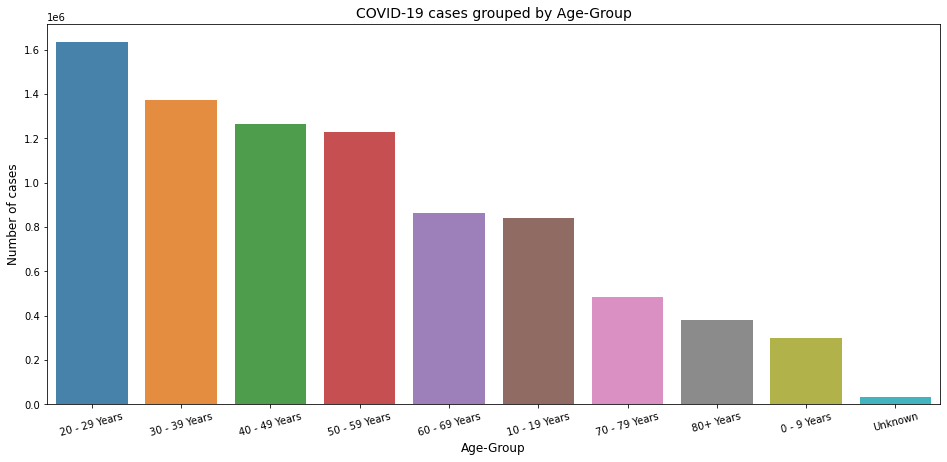

In [5]:
cases_by_age_group  = dfSurv['age_group'].value_counts()
plt.figure(figsize=(16,7))
sns.barplot(cases_by_age_group.index, cases_by_age_group.values, 
            order=cases_by_age_group.index, alpha=0.9)
plt.xticks(rotation=15)
plt.title('COVID-19 cases grouped by Age-Group', fontsize=14)
plt.ylabel('Number of cases', fontsize=12)
plt.xlabel('Age-Group', fontsize=12)
plt.savefig('plots/COVID-19 cases grouped by Age-Group.png')
plt.show()

As observed in this visualization, people in age-groups '20-29 Years', '30-39 Years' and '40-49 Years' are top three groups getting COVID-19 infection. This is probably because these age groups might have to go out more often than others and possibly not following social distancing guidelines because of lower chances of having serious health complications.

Now let's visualize the COVID-19 deaths by age-group.

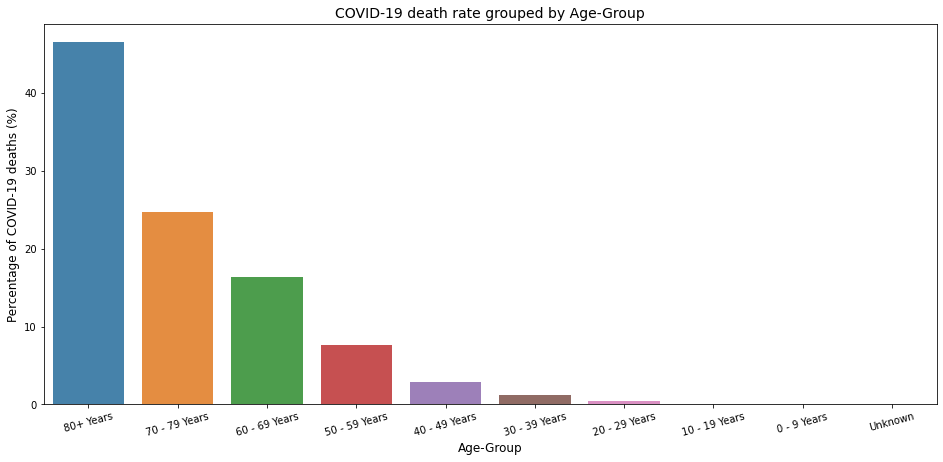

In [6]:
dfdeath = dfSurv[dfSurv.death_yn=='Yes']
deaths_by_age_group  = dfdeath['age_group'].value_counts(normalize=True)
plt.figure(figsize=(16,7))
sns.barplot(deaths_by_age_group.index, deaths_by_age_group.values*100, 
            order=deaths_by_age_group.index, alpha=0.9)
plt.xticks(rotation=15)
plt.title('COVID-19 death rate grouped by Age-Group', fontsize=14)
plt.ylabel('Percentage of COVID-19 deaths (%)', fontsize=12)
plt.xlabel('Age-Group', fontsize=12)
plt.savefig('plots/COVID-19 death rate grouped by Age-Group.png')
plt.show()

As observed in visual above, the age-groups '80+ Years', '70-79 Years' and '60-69 Years' are top 3 age-groups with highest COVID-19 mortality rate. This most probably happens due to co-morbidities and lower immunity in these age-groups.

Now let's analyze mortalities by race and ethnicity. 

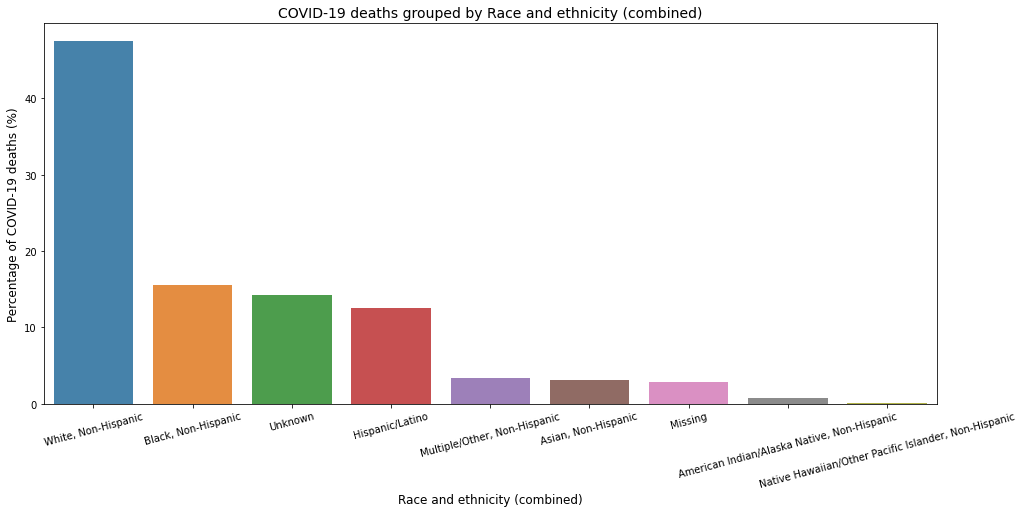

In [7]:
dfdeath = dfSurv[dfSurv.death_yn=='Yes']
deaths_by_age_group  = dfdeath['Race and ethnicity (combined)'].value_counts(normalize=True)
plt.figure(figsize=(16,7))
sns.barplot(deaths_by_age_group.index, deaths_by_age_group.values*100, 
            order=deaths_by_age_group.index, alpha=0.9)
plt.xticks(rotation=15)
plt.title('COVID-19 deaths grouped by Race and ethnicity (combined)', fontsize=14)
plt.ylabel('Percentage of COVID-19 deaths (%)', fontsize=12)
plt.xlabel('Race and ethnicity (combined)', fontsize=12)
plt.savefig('plots/COVID-19 deaths grouped by Race and ethnicity.png')
plt.show()

This visualization shows 'Non-Hispanic White' group has highest mortality as compared to other race and ethnicity groups. However, please note non-Hispanic White group has highest population in United States. Hence it will be better to visualize data alongside distribution of population. For this analysis we will use COVID-19 deaths and populations data maintained by CDC. To getter accurate understanding we will use weighted distributed population and age standardized COVID-19 death rates. 

In [8]:
# Read data and show first 5 rows
dfMort = pd.read_csv('data/COVID_19_deaths_population.csv', sep=',', header=0)
dfMort.head()

,Data as of,Start week,End Week,State,Race/Hispanic origin,Count of COVID-19 deaths,Distribution of COVID-19 deaths (%),Unweighted distribution of population (%),Weighted distribution of population (%),Difference between COVID-19 and unweighted population %,Difference between COVID-19 and weighted population %,AgeGroup,Suppression
0,12/09/2020,02/01/2020,12/05/2020,United States,Non-Hispanic White,148043.0,56.6,60.1,40.7,-3.5,15.9,"All ages, unadjusted",NaN
1,12/09/2020,02/01/2020,12/05/2020,United States,Non-Hispanic Black,47617.0,18.2,12.5,15.1,5.7,3.1,"All ages, unadjusted",NaN
2,12/09/2020,02/01/2020,12/05/2020,United States,Non-Hispanic American Indian or Alaska Native,2851.0,1.1,0.7,0.3,0.4,0.8,"All ages, unadjusted",NaN
3,12/09/2020,02/01/2020,12/05/2020,United States,Non-Hispanic Asian,9690.0,3.7,5.8,9.6,-2.1,-5.9,"All ages, unadjusted",NaN
4,12/09/2020,02/01/2020,12/05/2020,United States,Non-Hispanic Native Hawaiian or Other Pacific ...,477.0,0.2,0.2,0.1,0.0,0.1,"All ages, unadjusted",NaN


Now we will explore distribution of COVID-19 deaths across all race and ethnicity groups as well as subgroup it by age-groups.  

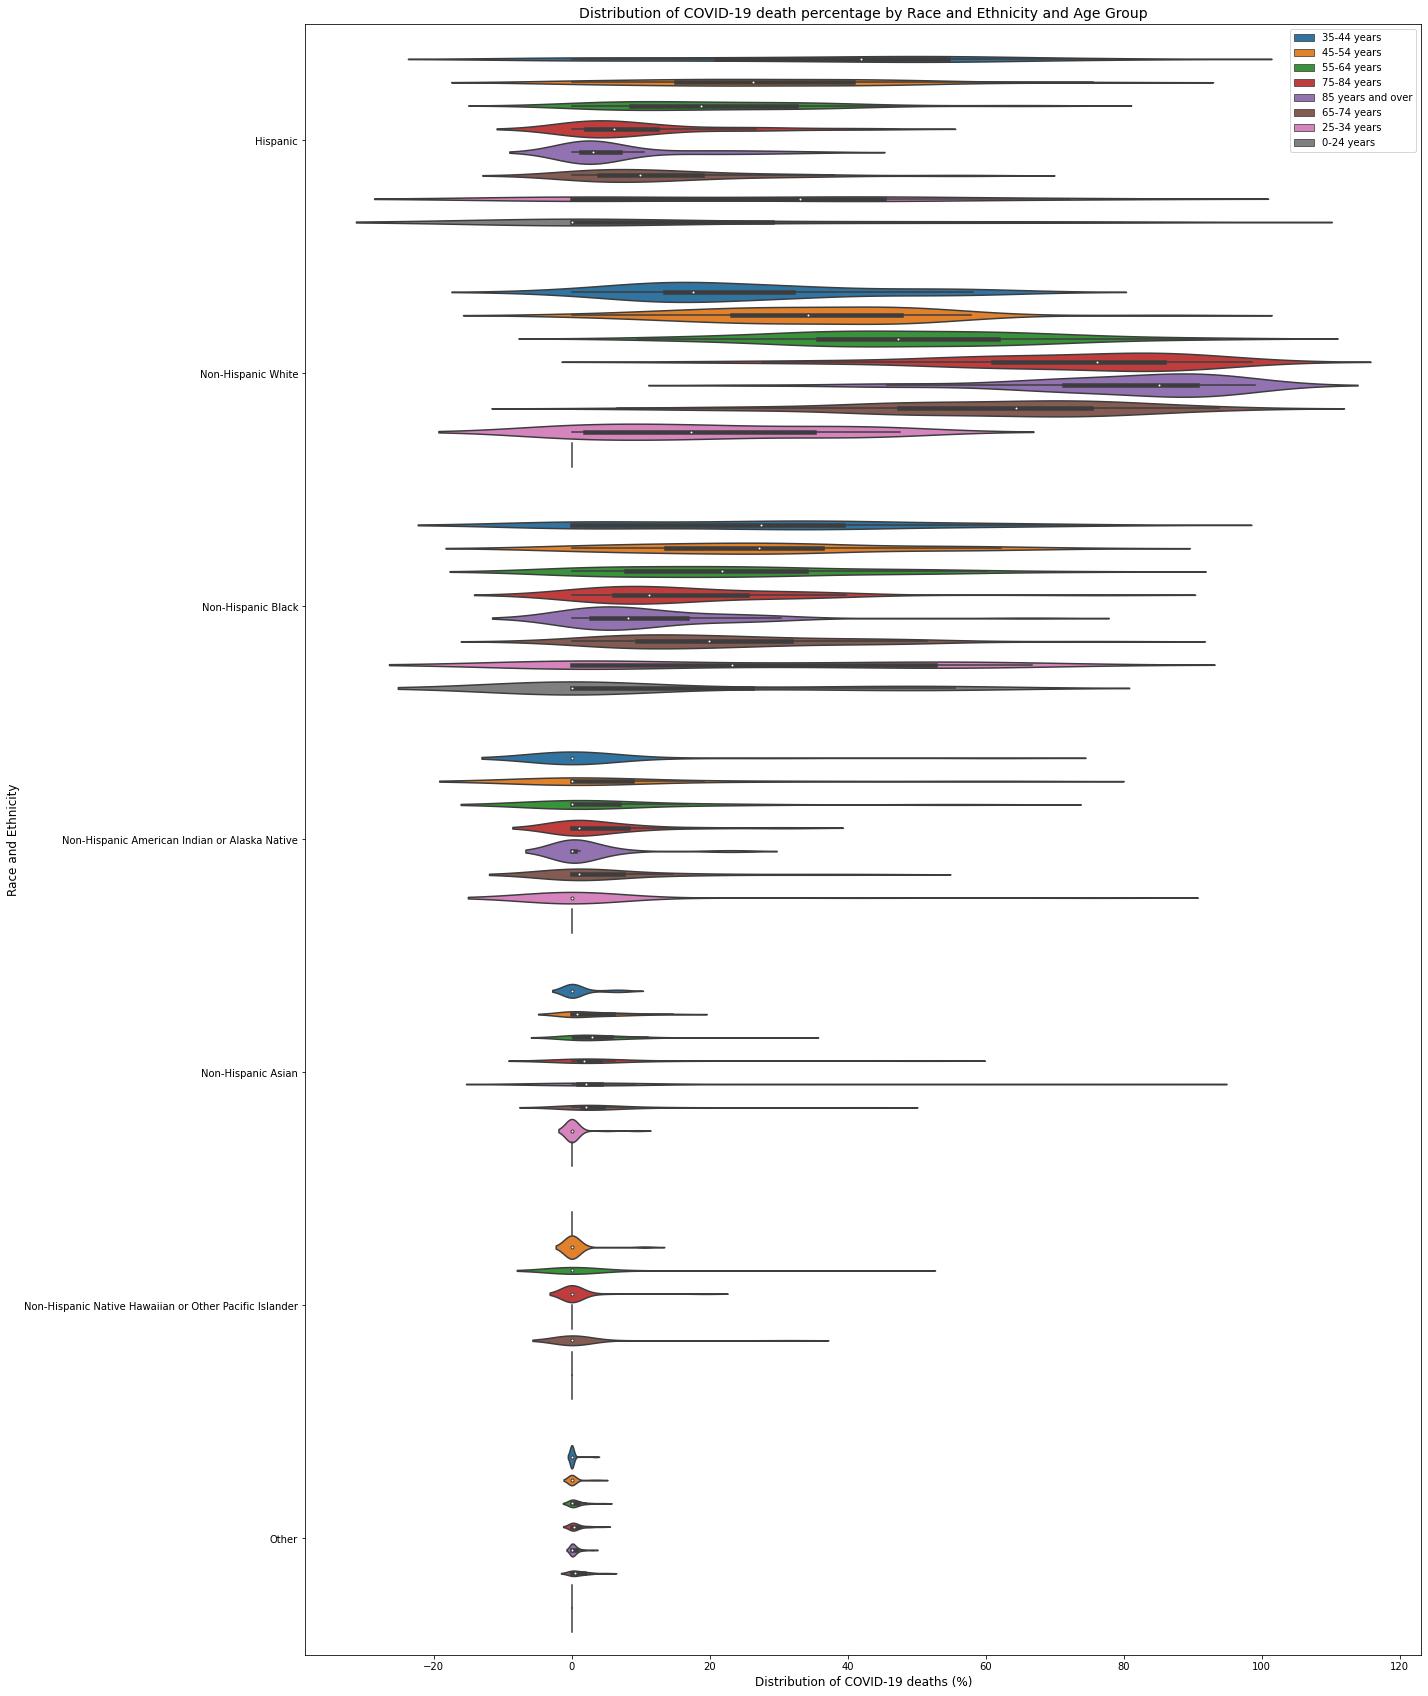

In [9]:
# Filter out aggregated age unadjusted and age standardized data, keep granular age-group data
dfMortUnAdjusted = dfMort[((dfMort['AgeGroup']!= 'All ages, standardized') 
                           & (dfMort['AgeGroup']!= 'All ages, unadjusted')
                           & (dfMort['State'] != 'United States'))]
plt.figure(figsize=(20,30))
ax = sns.violinplot(x="Distribution of COVID-19 deaths (%)", y="Race/Hispanic origin", data=dfMortUnAdjusted, 
                    hue='AgeGroup', legend_out=False)
plt.title('Distribution of COVID-19 death percentage by Race and Ethnicity and Age Group', fontsize=14)
plt.ylabel('Race and Ethnicity', fontsize=12)
plt.xlabel('Distribution of COVID-19 deaths (%)', fontsize=12)
plt.legend(loc='upper right')
plt.savefig('plots/Distribution of COVID-19 death percentage by Race and Ethnicity and Age Group.png')
plt.show()

As we observed from this plot and supplemented by earlier analysis, it is evident that COVID-19 affect age groups differently. We will adjust mortality rates for differences in the age distribution of populations, a common and important tool that health researchers use to compare diseases that affect age groups differently. 

For ease of comparison, we will plot age unadjusted COVID-19 death rate followed by and age adjusted COVID-19 death rate, both in conjunction with weighted population distribution (%). 

Let's first perform data filtering, and transformation required to slice data for age unadjusted COVID-19 death rate. 

In [15]:
# Filter out data, keep national level age-standardized data
df_age_unadjusted = dfMort[(dfMort['AgeGroup']== 'All ages, unadjusted') & (dfMort['State'] == 'United States')]
# Subset required columns only
df_age_unadjusted = df_age_unadjusted[['Race/Hispanic origin', 'Distribution of COVID-19 deaths (%)', 
                                           'Unweighted distribution of population (%)']]
# Melt up dataframe to make it compatible for plotting multiple bars chart
df = pd.melt(df_age_unadjusted, id_vars="Race/Hispanic origin", 
             var_name="Distribution", value_name="Percentage (%)")

We will now plot Age unadjusted COVID-19 death percentage and Unweighted population distribution by Race and Ethnicity. 

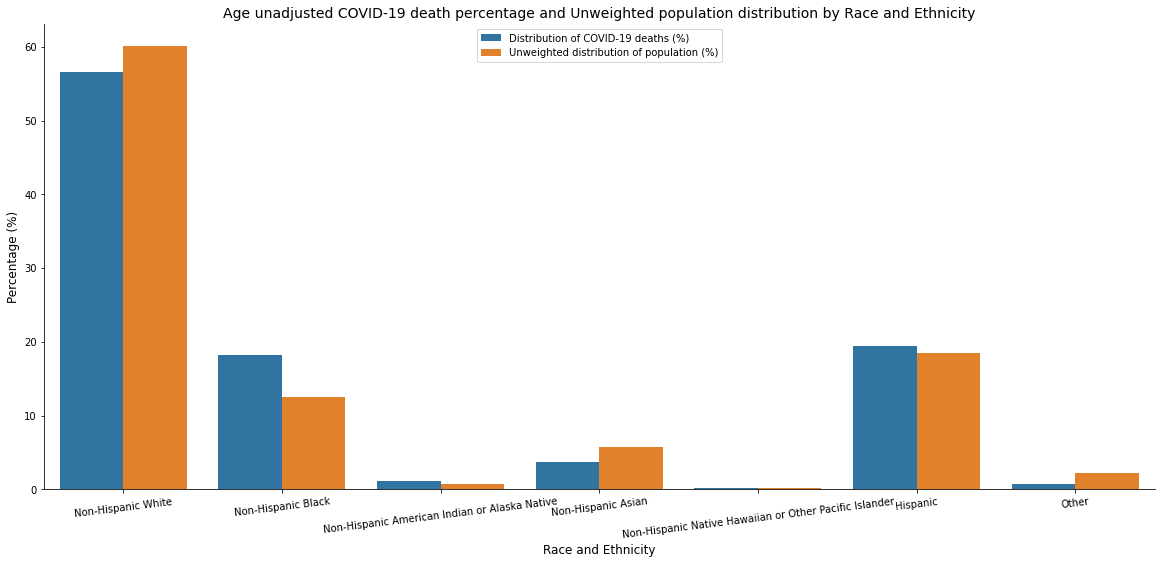

In [16]:
# Use Seaborn catplot, set x, y, hue, height and aspect etc. 
sns.catplot(x='Race/Hispanic origin', y='Percentage (%)', hue='Distribution', data=df, 
            kind='bar', height=7, aspect=16/7, legend_out=False)
plt.xticks(rotation=7)
plt.title('Age unadjusted COVID-19 death percentage and Unweighted population distribution by Race and Ethnicity', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Race and Ethnicity', fontsize=12)
plt.legend(loc='upper center')
plt.savefig('plots/Age unadjusted COVID-19 death percentage and Unweighted population distribution by Race and Ethnicity.png')
plt.show()

Let's now perform data filtering, and transformation required to slice data for age adjusted COVID-19 death rate. 

In [12]:
# Filter out data, keep national level age-standardized data
df_age_standardized = dfMort[(dfMort['AgeGroup']== 'All ages, standardized') & (dfMort['State'] == 'United States')]
# Subset required columns only
df_age_standardized = df_age_standardized[['Race/Hispanic origin', 'Distribution of COVID-19 deaths (%)', 
                                           'Weighted distribution of population (%)']]
# Melt up dataframe to make it compatible for plotting multiple bars chart
df = pd.melt(df_age_standardized, id_vars="Race/Hispanic origin", 
             var_name="Distribution", value_name="Percentage (%)")

We will now plot Age adjusted COVID-19 death percentage and Weighted population distribution by Race and Ethnicity.

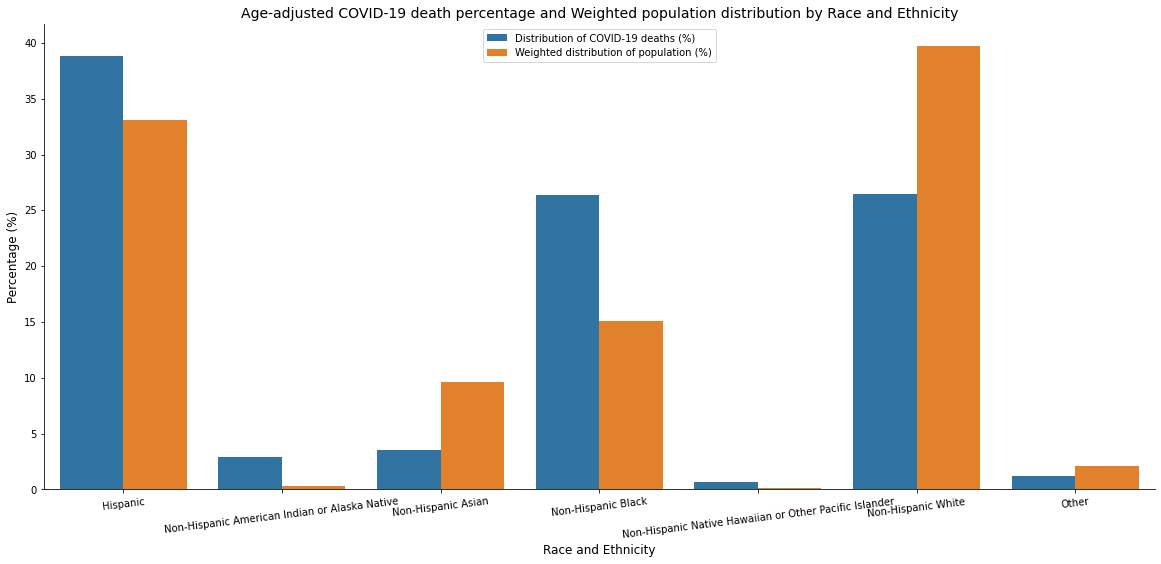

In [13]:
# Use Seaborn catplot, set x, y, hue, height and aspect etc. 
sns.catplot(x='Race/Hispanic origin', y='Percentage (%)', hue='Distribution', data=df, 
            kind='bar', height=7, aspect=16/7, legend_out=False)
plt.xticks(rotation=7)
plt.title('Age-adjusted COVID-19 death percentage and Weighted population distribution by Race and Ethnicity', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Race and Ethnicity', fontsize=12)
plt.legend(loc='upper center')
plt.savefig('plots/Age-adjusted COVID-19 death percentage and Weighted population distribution by Race and Ethnicity.png')
plt.show()

As observed in Age-unadjusted plot, the 'Non-Hispanic White' group found to be most impacted group. However as we analyze further age-adjusted plots of COVID-19 death rate, the 'Hispanic' and 'Non-Hispanic Black' groups found to be most impacted groups. 

## Findings

This human centered data science project helped me get answers to my research questions, discover surprising facts as well as validate some of the related work findings. 

The detailed multi-faceted analysis performed in this project has helped me learn that people in age-groups '20-29 Years', '30-39 Years' and '40-49 Years' are top three groups getting COVID-19 infection. This is probably because these age groups might have to go out more often than others and possibly not following social distancing guidelines because of lower chances of having serious health complications. Though these groups are high on infection rate, the mortality rate is much higher in older population. Especially '80+ Years', '70-79 Years' and '60-69 Years' are top 3 age-groups with highest COVID-19 mortality rate. This most probably happens due to co-morbidities and lower immunity in these age-groups. 

Adjusting the data for age differences in race groups widens the gap in the overall mortality rates between all other groups and Whites, who have the lowest rate. As we found in race and ethnicity analysis, we found that as per Age-unadjusted data, the 'Non-Hispanic White' group is suffering most from COVID-19. As we addressed population distribution difference by using weighted population distribution and as we used age-adjusted COVID-19 death rate, we discovered that the 'Hispanic' and 'Non-Hispanic Black' groups found to be most impacted groups. 

## Discussion

#### Implications

With cognizant application of principles of human centered data science coursework, through this project we discovered the demographic disparities in COVID-19 impact on various segments of population. By continuously measuring and visually monitoring inequitable mortality impact of COVID-19 on certain communities, this project can serve as a tool to help health agencies, government agencies, lawmakers and volunteering organizations to guide policy and community responses towards addressing these disproportionate deaths. The scale of these disparities forces us to focus our attention on the effects of structural inequality in community with respect to a wide range of outcomes including income, health care, employment, and living conditions. Various initiatives such as government aids, social distancing guidelines, prevention activities, healthcare kits, supplies etc. can be provided in more targeted and effective manner to most vulnerable community groups. The findings and methodology of this project can serve to help us achieve this. 

#### Limitations

As data available is limited to United Stated only, this project analysis is scoped to United States only. This analysis could't include county level analysis as CDC COVID-19 surveillance dataset didn't support joining with such other data sources. The provisional counts for COVID-19 deaths are based on a current flow of mortality data in the National Vital Statistics System. It is important to note that it can take several weeks for death records to be submitted to National Center for Health Statistics (NCHS), and processed. Therefore, the data used here may be incomplete, and will likely not include all deaths that occurred during a given time period, especially for the more recent time periods. Death counts for earlier weeks are continually revised and may increase or decrease as new and updated death certificate data are received from the states by NCHS. 

## Conclusion

COVID-19, a global health crisis is impacting lives of people all over the world. It isn't only a disease, but it is a human, economic and social crisis. The coronavirus disease is attacking human societies and businesses at their core. Though COVID-19 pandemic affects all segments of the population, it is observed that there is significant demographic disparity in COVID-19 cases and its impact. As observed throughout analysis performed in this project, the mortality effects of COVID-19 are much severe in old age people community as well as people in non-Hispanic Blacks and Hispanics race and ethnicities. By continuously monitoring any such disparities, bringing it to attention of authorities and take appropriate steps to overcome these disparities is very critical. Moreover, going beyond COVID-19, taking human centered learnings from this, we all should work towards addressing long pending structural inequality in communities along racial/ethnic lines with respect to a wide range of outcomes including education, employment, income, health care, and living conditions. 

## References

[1] Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations (version date: December 04, 2020)

[2] Centers for Disease Control and Prevention, COVID-19 Response. Distribution of COVID-19 deaths and populations, by jurisdiction, age, and race and Hispanic origin (version date: December 09, 2020)

[3] APM Research Lab. (2020, November 12). THE COLOR OF CORONAVIRUS [Blog post] Retrieved from [source](https://www.apmresearchlab.org/covid/deaths-by-race#:~:text=The%20COVID%2D19%20death%20rate,per%20100%2C000%2C%20as%20shown%20below.)